# Ocean station Papa

This notebook plots the vertical profiles of the simulated temperature at the end of each stage in the [ocean station Papa](https://www.pmel.noaa.gov/ocs/Papa) case.

In [1]:
import sys
import numpy as np
import string
import matplotlib.pyplot as plt
# add the path of gotmtool
sys.path.append("../gotmtool")
from gotmtool import *

## Load data

First, store the information of the four simulations into lists and dictionaries.

In [2]:
casenames = [
    'GLS-C01A',
    'KPP-CVMix',
    'KPPLT-VR12',
    'KPPLT-LF17',
    ]

colors = {
    'GLS-C01A': 'tab:blue',
    'KPP-CVMix': 'tab:olive',
    'KPPLT-VR12': 'tab:orange',
    'KPPLT-LF17': 'tab:red',
    }

rundates = {
    '2012-03-21': '2012-05-21',
    '2012-05-21': '2012-08-21',
    '2012-08-21': '2013-01-12',
    '2013-01-12': '2013-03-21',
    }

casedir = '../gotm/run/OSPapa'
save_fig = True

Load data for the four simulations and four stages into a dictionary.

In [3]:
sims = {}
dataset = {}
for case in casenames:
    sims0 = {}
    dataset0 = {}
    for start in rundates.keys():
        end = rundates[start]
        sim = Simulation(path=casedir+'/'+case+'_'+start+'_'+end)
        sims0[start] = sim
        dataset0[start] = sim.load_data()
    sims[case] = sims0
    dataset[case] = dataset0

## Figure

A comparison of the vertical profiles of the daily mean temperature (panels (a)-(d)) and salinity (panels (e)-(h)) at Ocean Station Papa between the observation (black) and GOTM simulations (colored).

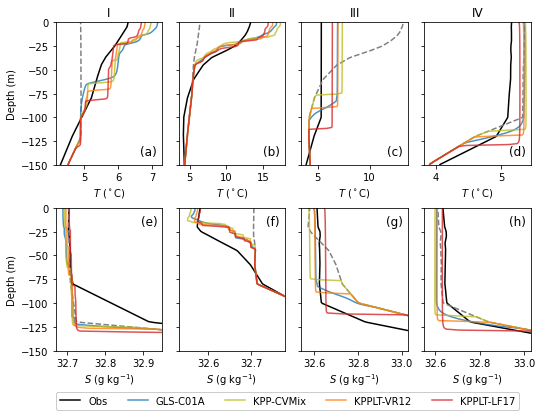

In [4]:
fig, axarr = plt.subplots(2,4, sharey='row')
fig.set_size_inches([8,6])
for i, start in enumerate(rundates.keys()):
    if i == 0:
        label = 'Obs'
    else:
        label = None
    data    = dataset['KPP-CVMix'][start]
    tpfl_obs =  data.temp_obs[:,-8:,0,0].mean('time')
    tpfl_obs.plot(y='z', ax=axarr[0,i], color='k',
                  linewidth=1.5)
    spfl_obs =  data.salt_obs[:,-8:,0,0].mean('time')
    spfl_obs.plot(y='z', ax=axarr[1,i], color='k',
                  linewidth=1.5, label=label)
    
    tpfl_obs =  data.temp_obs[:,0,0,0]
    tpfl_obs.plot(y='z', ax=axarr[0,i], color='gray',
                  linestyle='--', linewidth=1.5)
    spfl_obs =  data.salt_obs[:,0,0,0]
    spfl_obs.plot(y='z', ax=axarr[1,i], color='gray',
                  linestyle='--', linewidth=1.5)
    
    for case in casenames:
        if i == 0:
            label = case
        else:
            label = None
        temp = dataset[case][start].temp[:,-8:,0,0].mean('time')
        temp.plot(y='z', ax=axarr[0,i], color=colors[case],
                  linewidth=1.5, alpha=0.8)
        salt = dataset[case][start].salt[:,-8:,0,0].mean('time')
        salt.plot(y='z', ax=axarr[1,i], color=colors[case],
                  linewidth=1.5, alpha=0.8, label=label)

axarr[1,0].legend(loc = 'lower left', fontsize=10, ncol=5,
                  bbox_to_anchor=(-0.04, -0.45), framealpha=1)
    
for i in np.arange(2):
    for j in np.arange(4):
        k = i*4+j
        ax = axarr[i,j]
        ax.set_title('')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim([-150,0])
        if i == 0:
            ax.text(0.95, 0.05, '('+string.ascii_lowercase[k]+')',
                    transform=ax.transAxes, fontsize=12, va='bottom', ha='right')
        else:
            ax.text(0.95, 0.95, '('+string.ascii_lowercase[k]+')',
                    transform=ax.transAxes, fontsize=12, va='top', ha='right')
    axarr[i,0].set_ylabel('Depth (m)')
stages = ['I', 'II', 'III', 'IV']
for j in np.arange(4):
    axarr[0,j].set_title(stages[j])
    axarr[0,j].set_xlabel('$T$ ($^\circ$C)')
    axarr[1,j].set_xlabel('$S$ (g kg$^{-1}$)')
    
axarr[1,0].set_xlim([32.67, 32.95])
axarr[1,1].set_xlim([32.53, 32.78])
axarr[1,2].set_xlim([32.54, 33.03])
axarr[1,3].set_xlim([32.55, 33.03])
    
if save_fig:
    plt.subplots_adjust(top=0.93, bottom=0.17, right=0.95, hspace=0.3, wspace=0.15)
    figname = 'ospapa_pfl.pdf'
    fig.savefig(figname, dpi=300)